The purpose of this notebook is to examine sales statistics from a supermarket, communicate interesting findings and answer given questions from the company's purchase deparment. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data import

In the folder 'data', there are 3 csv files: sales, articles and rating. Import those and look at the first rows of each dataframe.

In [2]:
sales = pd.read_csv('sales.csv')
sales

,Invoice ID,Unit price,Quantity,Total Sales,Date,Time,Payment,Customer type,Gender,City,Art Key
0,750-67-8428,74.69,7,548.9715,1/5/2019,13:08,Ewallet,Member,Female,Yangon,1
1,226-31-3081,15.28,5,80.2200,3/8/2019,10:29,Cash,Normal,Female,Naypyitaw,5
2,631-41-3108,46.33,7,340.5255,3/3/2019,13:23,Credit card,Normal,Male,Yangon,10
3,123-19-1176,58.22,8,489.0480,1/27/2019,20:33,Ewallet,Member,Male,Yangon,3
4,373-73-7910,86.31,7,634.3785,2/8/2019,10:37,Ewallet,Normal,Male,Yangon,19
...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,40.35,1,42.3675,1/29/2019,13:46,Ewallet,Normal,Male,Naypyitaw,2
996,303-96-2227,97.38,10,1022.4900,3/2/2019,17:16,Ewallet,Normal,Female,Mandalay,13
997,727-02-1313,31.84,1,33.4320,2/9/2019,13:22,Cash,Member,Male,Yangon,23
998,347-56-2442,65.82,1,69.1110,2/22/2019,15:33,Cash,Normal,Male,Yangon,10


In [3]:
articles = pd.read_csv('articles.csv')
articles.head()

,Product line,Article,Art Key
0,Health and beauty,Anti Age Eye Cream,2
1,Electronic accessories,Microwave,5
2,Home and lifestyle,Wall Mirror,11
3,Sports and travel,Swimsuit,20
4,Electronic accessories,Samsung Galaxy,8


In [4]:
rating = pd.read_csv('rating.csv')
rating.head()

,Invoice ID,Rating
0,750-67-8428,9.1
1,226-31-3081,9.6
2,631-41-3108,7.4
3,123-19-1176,8.4
4,373-73-7910,5.3


# Data prep

The Total Sales column shows total sales including VAT. The VAT is 5%. The company is interested in sales statistics that don't include VAT. Therefore, create the column 'Total Excl VAT' where 5% VAT is removed from the Total Sales column.


Throughout this code, only use the excl VAT column, not Total Sales.


In [8]:
VAT = 0.05
sales['Total Excl VAT'] = sales['Total Sales'] *(1-VAT)
sales.head()

,Invoice ID,Unit price,Quantity,Total Sales,Date,Time,Payment,Customer type,Gender,City,Art Key,Total Excl VAT
0,750-67-8428,74.69,7,548.9715,1/5/2019,13:08,Ewallet,Member,Female,Yangon,1,521.522925
1,226-31-3081,15.28,5,80.2200,3/8/2019,10:29,Cash,Normal,Female,Naypyitaw,5,76.209000
2,631-41-3108,46.33,7,340.5255,3/3/2019,13:23,Credit card,Normal,Male,Yangon,10,323.499225
3,123-19-1176,58.22,8,489.0480,1/27/2019,20:33,Ewallet,Member,Male,Yangon,3,464.595600
4,373-73-7910,86.31,7,634.3785,2/8/2019,10:37,Ewallet,Normal,Male,Yangon,19,602.659575


In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Invoice ID      1000 non-null   object 
 1   Unit price      1000 non-null   float64
 2   Quantity        1000 non-null   int64  
 3   Total Sales     1000 non-null   float64
 4   Date            1000 non-null   object 
 5   Time            1000 non-null   object 
 6   Payment         1000 non-null   object 
 7   Customer type   1000 non-null   object 
 8   Gender          1000 non-null   object 
 9   City            1000 non-null   object 
 10  Art Key         1000 non-null   int64  
 11  Total Excl VAT  1000 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


In [14]:
sales.describe()

,Unit price,Quantity,Total Sales,Art Key,Total Excl VAT
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,458.023568,16.616000,435.122389
std,26.494628,2.923431,1942.359790,10.376715,1845.241800
min,10.080000,1.000000,12.694500,1.000000,12.059775
25%,32.875000,3.000000,125.401500,7.000000,119.131425
50%,55.230000,5.000000,256.961250,16.000000,244.113187
75%,77.935000,8.000000,479.705625,26.000000,455.720344
max,99.960000,10.000000,38579.000000,34.000000,36650.050000


# Explore the value distribution in total sales 

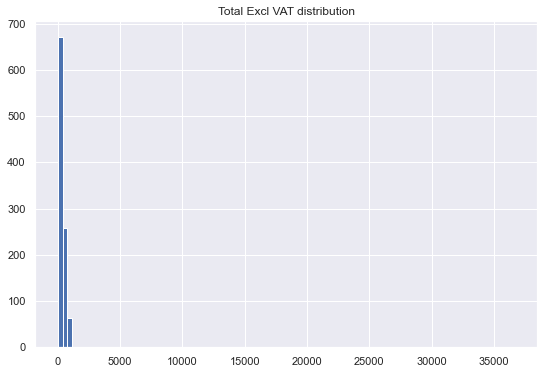

In [17]:
plt.figure(figsize=(9,6))
plt.hist(sales['Total Excl VAT'], bins=100)
#lt.xticks(np.arange(min(sales['Total Excl VAT'], max(sales['Total Excl VAT'], 10))))
plt.title('Total Excl VAT distribution')
plt.show();

# As for sales and sales units, what does a normal receipt look like? 

# As for rating, which articles and product lines seem to be most popular?

In [19]:
sales_rating = sales.merge(rating, on='Invoice ID', how='left')

In [20]:
sales_rating.head()

,Invoice ID,Unit price,Quantity,Total Sales,Date,Time,Payment,Customer type,Gender,City,Art Key,Total Excl VAT,Rating
0,750-67-8428,74.69,7,548.9715,1/5/2019,13:08,Ewallet,Member,Female,Yangon,1,521.522925,9.1
1,226-31-3081,15.28,5,80.2200,3/8/2019,10:29,Cash,Normal,Female,Naypyitaw,5,76.209000,9.6
2,631-41-3108,46.33,7,340.5255,3/3/2019,13:23,Credit card,Normal,Male,Yangon,10,323.499225,7.4
3,123-19-1176,58.22,8,489.0480,1/27/2019,20:33,Ewallet,Member,Male,Yangon,3,464.595600,8.4
4,373-73-7910,86.31,7,634.3785,2/8/2019,10:37,Ewallet,Normal,Male,Yangon,19,602.659575,5.3


In [21]:
sales_rating_articles = sales_rating.merge(articles, on='Art Key', how='left')
sales_rating_articles.head()

,Invoice ID,Unit price,Quantity,Total Sales,Date,Time,Payment,Customer type,Gender,City,Art Key,Total Excl VAT,Rating,Product line,Article
0,750-67-8428,74.69,7,548.9715,1/5/2019,13:08,Ewallet,Member,Female,Yangon,1,521.522925,9.1,Health and beauty,Body Butter Coconut
1,226-31-3081,15.28,5,80.2200,3/8/2019,10:29,Cash,Normal,Female,Naypyitaw,5,76.209000,9.6,Electronic accessories,Microwave
2,631-41-3108,46.33,7,340.5255,3/3/2019,13:23,Credit card,Normal,Male,Yangon,10,323.499225,7.4,Home and lifestyle,Blue Velvet Couch
3,123-19-1176,58.22,8,489.0480,1/27/2019,20:33,Ewallet,Member,Male,Yangon,3,464.595600,8.4,Health and beauty,Toothpase Mint
4,373-73-7910,86.31,7,634.3785,2/8/2019,10:37,Ewallet,Normal,Male,Yangon,19,602.659575,5.3,Sports and travel,Football Socks


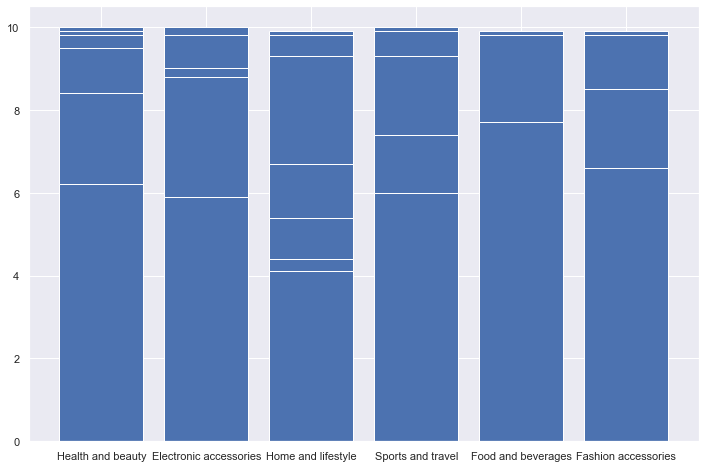

In [23]:
plt.figure(figsize=(12, 8))
plt.bar(sales_rating_articles['Product line'], height=sales_rating_articles['Rating'])
plt.show()

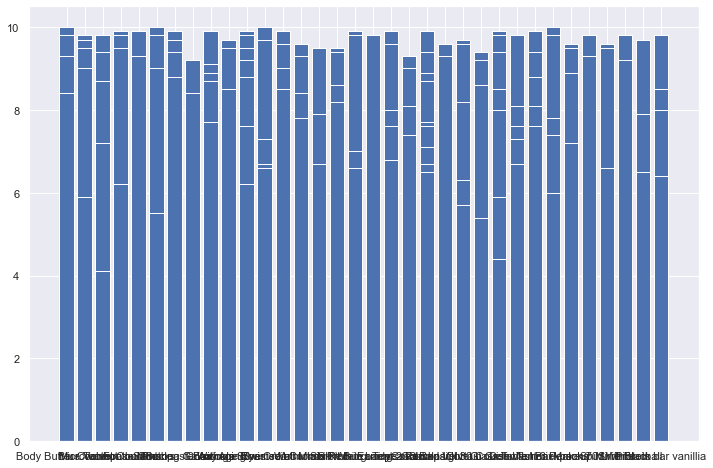

In [24]:
plt.figure(figsize=(12, 8))
plt.bar(sales_rating_articles['Article'], height=sales_rating_articles['Rating'])
plt.show()

# What is the total sales for backpacks? 